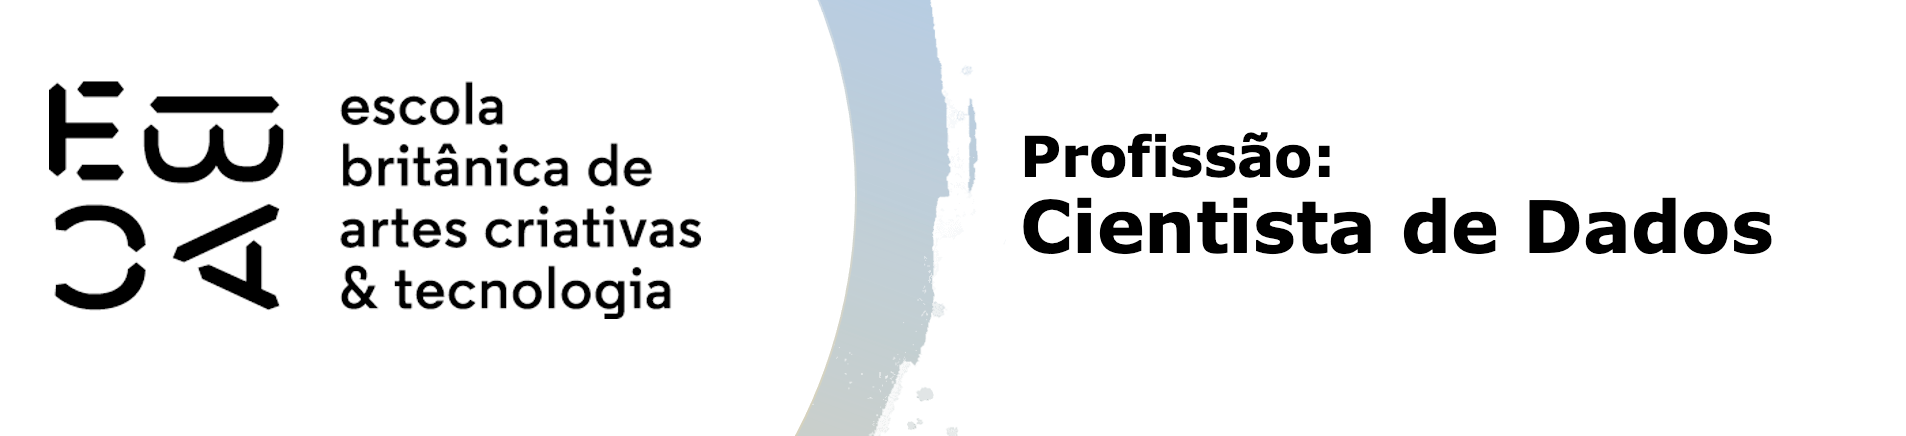

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [167]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.graphics.tsaplots as tsaplots
from sklearn.preprocessing import StandardScaler




df = pd.read_csv('previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [98]:
df.isnull().sum()

data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [99]:
df.fillna(df['tempo_emprego'].mean(), inplace=True)

In [100]:
X = df.drop('renda', axis=1)
y = df['renda']

In [209]:
#separandp as bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1993)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [102]:
df_train.shape, df_test.shape

((600000, 14), (150000, 14))

In [103]:
df_train.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda'],
      dtype='object')

In [104]:
#modelo
modelo1 = smf.ols(formula='''np.log(renda) ~  sexo + posse_de_veiculo + posse_de_imovel +
                                              qtd_filhos + tipo_renda + idade +
                                              tempo_emprego + qt_pessoas_residencia''', data=df_train).fit()

In [105]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                 3.542e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:39:44   Log-Likelihood:            -8.5133e+05
No. Observations:              600000   AIC:                         1.703e+06
Df Residuals:                  599988   BIC:                         1.703e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.7358      0.009    859.195      0.000       7.718       7.753
sexo[T.M]                          0.1269      0.003     41.880      0.000       0.121       0.133
posse_de_veiculo[T.S]              0.0138      0.003      4.777      0.000       0.008       0.019
posse_de_imovel[T.S]               0.1871      0.003     67.349      0.000       0.182       0.193
tipo_renda[T.Bolsista]            -0.1694      0.057     -2.989      0.003      -0.281      -0.058
tipo_renda[T.Empresário]           0.1539      0.003     47.250      0.000       0.147       0.160
tipo_renda[T.Pensionista]         -0.2983      0.005    -64.385      0.000      -0.307      -0.289
tipo_renda[T.Servidor público]     0.1470      0.005     30.709      0.000       0.138       0.156
qtd_filhos                         0.0179      0.004      4.591      0.000       0.010       0.026
idade                              0.0036      0.000     22.052      0.000       0.003       0.004
tempo_emprego                      0.1290      0.000    567.439      0.000       0.129       0.129
qt_pessoas_residencia             -0.0126      0.003     -3.949      0.000      -0.019      -0.006
==============================================================================
Omnibus:                     3240.301   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2327.860
Skew:                          -0.023   Prob(JB):                         0.00
Kurtosis:                       2.698   Cond. No.                     2.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

C:\Users\lksns\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


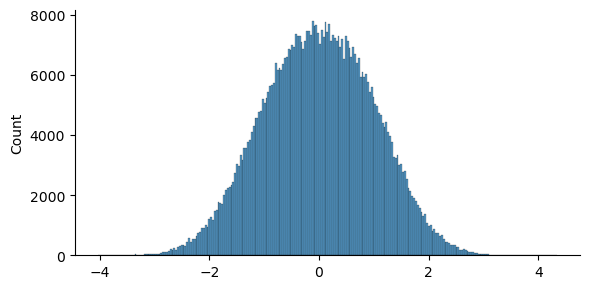

In [106]:
sns.displot(modelo1.resid, height=3, aspect=2);

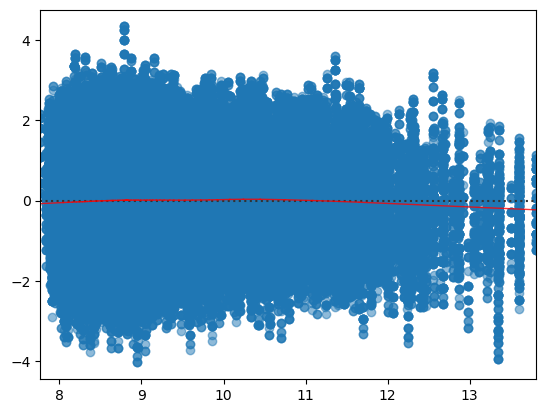

In [107]:
sns.residplot(x=modelo1.predict(), y=modelo1.resid, data=df, lowess=True, scatter_kws={'alpha':0.5},
             line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

In [108]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000  
mpl.rcParams['path.simplify_threshold'] = 1.0 

In [109]:
pred = modelo1.predict()
res = modelo1.resid

<Axes: >

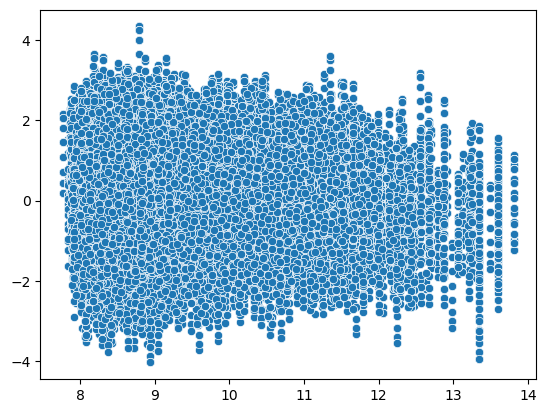

In [110]:
sns.scatterplot(x=pred, y=res)

In [111]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

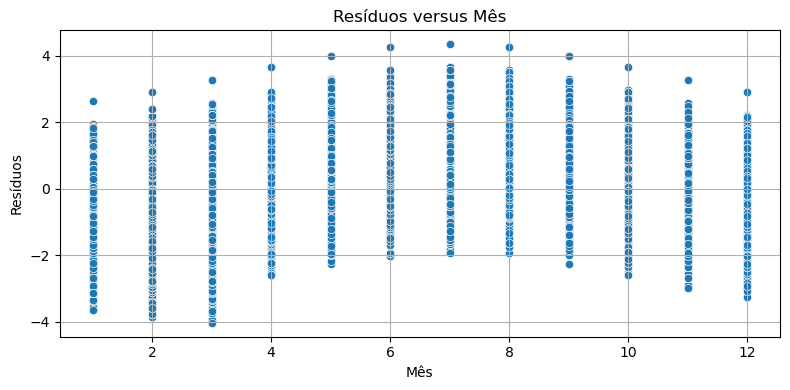

In [112]:
df['mes'] = df['data_ref'].dt.month


plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['mes'], y=res)
plt.title('Resíduos versus Mês')
plt.xlabel('Mês')
plt.ylabel('Resíduos')
plt.grid(True)
plt.tight_layout()
plt.show()

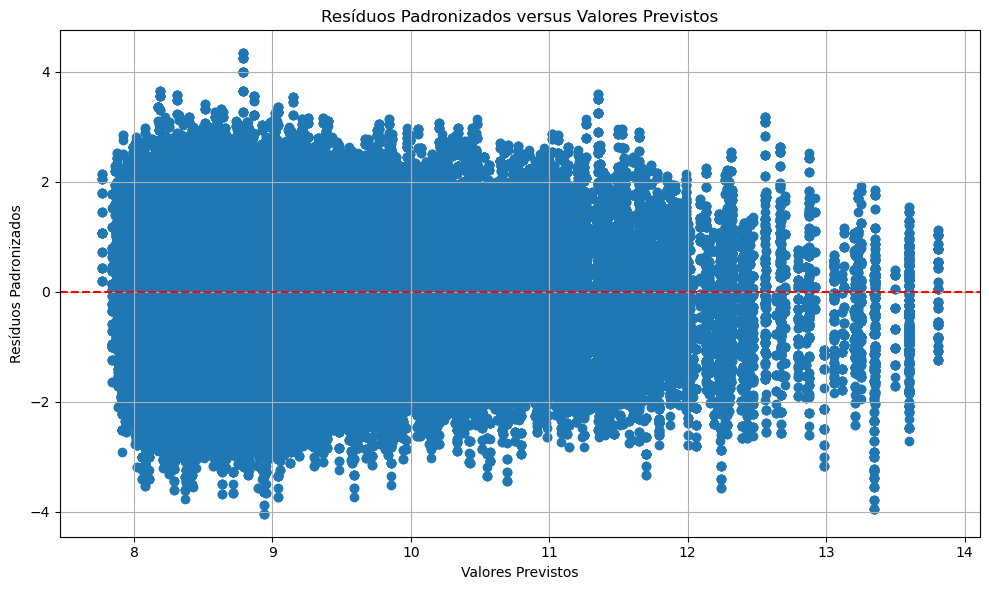

In [113]:
# Calculando os resíduos padronizados
std_res = res / np.std(res)

plt.figure(figsize=(10, 6))
plt.scatter(pred, std_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos Padronizados versus Valores Previstos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos Padronizados')
plt.grid(True)
plt.tight_layout()
plt.show()

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

<Axes: >

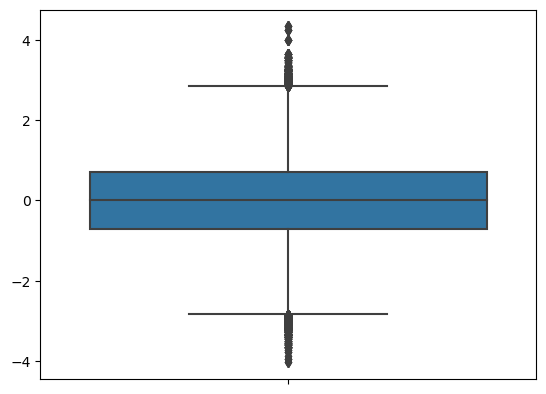

In [114]:
sns.boxplot(y=std_res)

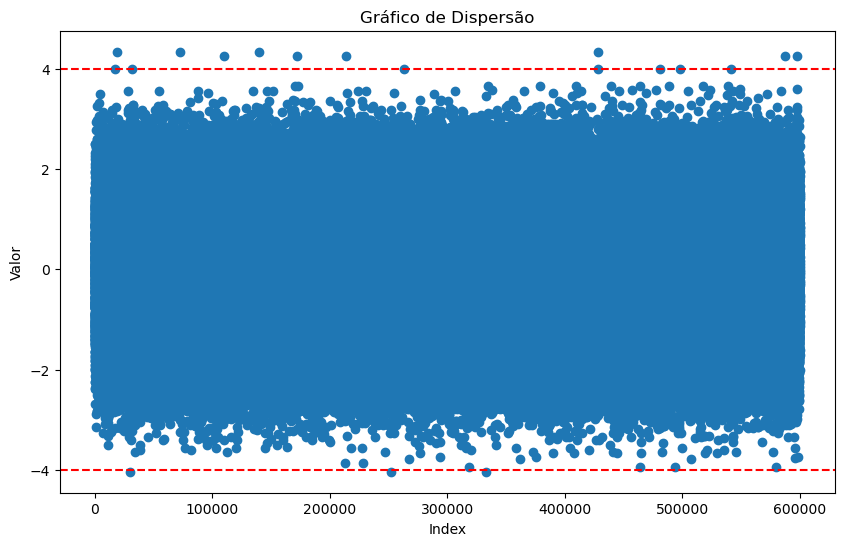

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(std_res)), std_res)
plt.axhline(y=4, color='r', linestyle='--')
plt.axhline(y=-4, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Valor')
plt.title('Gráfico de Dispersão')
plt.show()

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [132]:
df_d = pd.get_dummies(df2)

In [140]:
correlation_matrix = df_d.corr(method='spearman')
correlation_matrix

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_S,posse_de_imovel_N,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
qtd_filhos,1.000000,-0.415151,-0.052479,0.828600,-0.019957,-0.118979,0.118979,-0.120125,0.120125,0.014756,...,-0.011660,-0.129928,0.011926,-0.110355,0.009985,-0.044221,0.043468,-0.006703,0.036230,0.003364
idade,-0.415151,1.000000,0.264237,-0.350006,0.107999,0.215249,-0.215249,0.166339,-0.166339,-0.130489,...,0.057186,-0.069353,-0.057369,0.214403,-0.066653,0.155365,-0.190445,-0.017949,-0.006899,0.011105
tempo_emprego,-0.052479,0.264237,1.000000,-0.026615,0.564138,0.111236,-0.111236,0.049340,-0.049340,-0.000957,...,0.002597,-0.047051,-0.023216,0.027873,-0.023881,0.058487,-0.077043,-0.033943,0.028627,0.009416
qt_pessoas_residencia,0.828600,-0.350006,-0.026615,1.000000,-0.008260,-0.158574,0.158574,-0.173039,0.173039,0.018073,...,-0.263756,-0.486828,0.094172,-0.305468,-0.007286,-0.021624,0.026630,-0.003731,0.030513,-0.002589
renda,-0.019957,0.107999,0.564138,-0.008260,1.000000,0.005485,-0.005485,0.002209,-0.002209,-0.062270,...,0.010882,-0.017494,-0.012135,-0.005246,-0.009353,0.033061,-0.040263,-0.016726,0.008651,-0.001235
sexo_F,-0.118979,0.215249,0.111236,-0.158574,0.005485,1.000000,-1.000000,0.367430,-0.367430,-0.055353,...,0.062220,0.034315,0.024862,0.138822,-0.048382,0.062660,-0.053816,-0.020366,-0.053661,0.021501
sexo_M,0.118979,-0.215249,-0.111236,0.158574,-0.005485,-1.000000,1.000000,-0.367430,0.367430,0.055353,...,-0.062220,-0.034315,-0.024862,-0.138822,0.048382,-0.062660,0.053816,0.020366,0.053661,-0.021501
posse_de_veiculo_N,-0.120125,0.166339,0.049340,-0.173039,0.002209,0.367430,-0.367430,1.000000,-1.000000,-0.025415,...,0.076818,0.081675,0.035032,0.092673,-0.007171,0.021778,-0.021771,-0.028529,-0.031273,0.018888
posse_de_veiculo_S,0.120125,-0.166339,-0.049340,0.173039,-0.002209,-0.367430,0.367430,-1.000000,1.000000,0.025415,...,-0.076818,-0.081675,-0.035032,-0.092673,0.007171,-0.021778,0.021771,0.028529,0.031273,-0.018888
posse_de_imovel_N,0.014756,-0.130489,-0.000957,0.018073,-0.062270,-0.055353,0.055353,-0.025415,0.025415,1.000000,...,0.017151,-0.004828,0.033026,-0.039389,0.025821,-0.202921,0.157139,0.020386,0.038695,0.121679


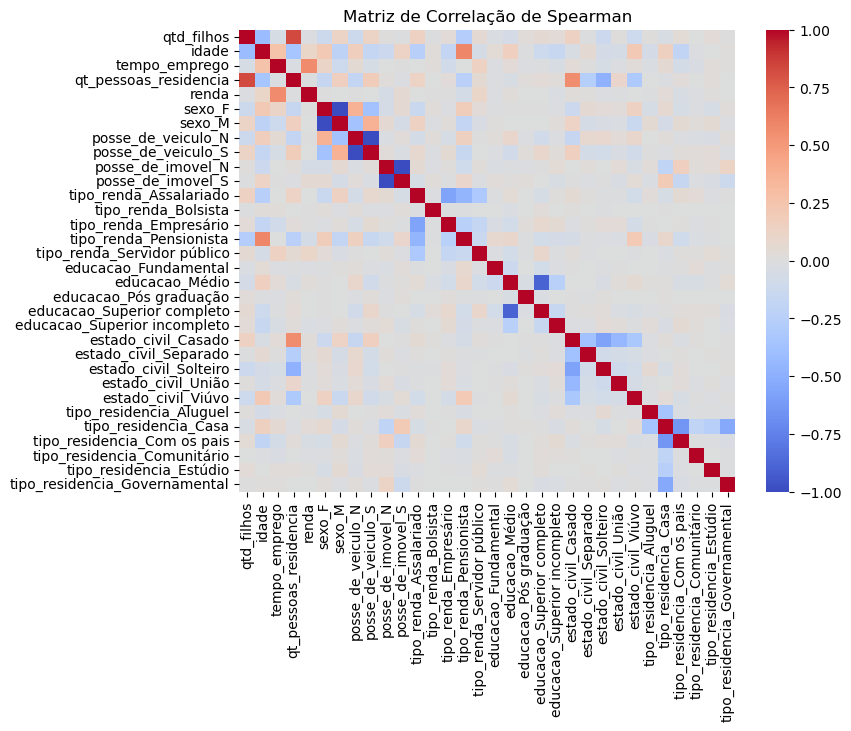

In [139]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação de Spearman')
plt.show()

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [212]:
scaler = StandardScaler()
df_test[['idade', 'tempo_emprego']] = scaler.fit_transform(df_test[['idade', 'tempo_emprego']])

In [210]:
modelo2 = smf.ols(formula='''np.log(renda) ~  sexo + posse_de_veiculo + posse_de_imovel +
                                              qtd_filhos + tipo_renda + idade +
                                              tempo_emprego + qt_pessoas_residencia''', data=df_test).fit()

In [211]:
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     8748.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:41:07   Log-Likelihood:            -2.1317e+05
No. Observations:              150000   AIC:                         4.264e+05
Df Residuals:                  149988   BIC:                         4.265e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.7533      0.018    429.002      0.000       7.718       7.789
sexo[T.M]                          0.1271      0.006     20.959      0.000       0.115       0.139
posse_de_veiculo[T.S]              0.0142      0.006      2.466      0.014       0.003       0.026
posse_de_imovel[T.S]               0.1809      0.006     32.457      0.000       0.170       0.192
tipo_renda[T.Bolsista]            -0.1335      0.124     -1.073      0.283      -0.377       0.110
tipo_renda[T.Empresário]           0.1440      0.007     22.081      0.000       0.131       0.157
tipo_renda[T.Pensionista]         -0.2938      0.009    -31.571      0.000      -0.312      -0.276
tipo_renda[T.Servidor público]     0.1332      0.010     13.900      0.000       0.114       0.152
qtd_filhos                         0.0085      0.008      1.081      0.280      -0.007       0.024
idade                              0.0032      0.000      9.852      0.000       0.003       0.004
tempo_emprego                      0.1286      0.000    282.704      0.000       0.128       0.130
qt_pessoas_residencia             -0.0068      0.006     -1.063      0.288      -0.019       0.006
==============================================================================
Omnibus:                      748.436   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.883
Skew:                          -0.025   Prob(JB):                    2.90e-119
Kurtosis:                       2.709   Cond. No.                     2.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\lksns\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\lksns\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Residuo Base de teste')

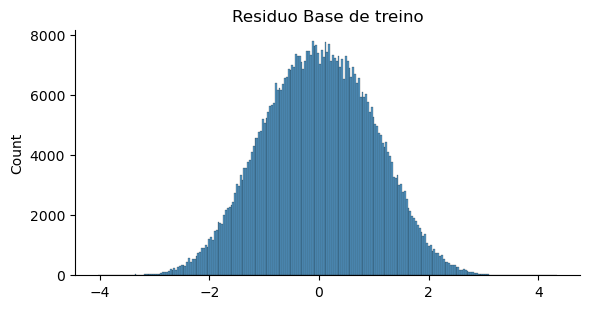

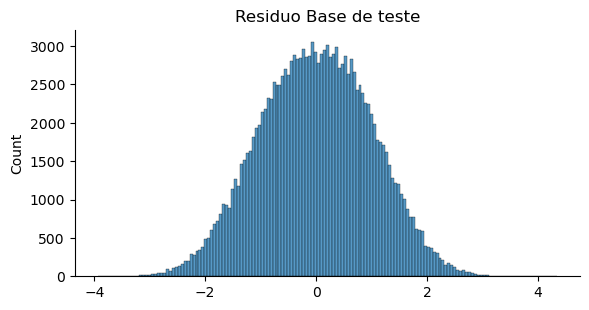

In [184]:
sns.displot(modelo1.resid, height=3, aspect=2)
plt.title('Residuo Base de treino')
sns.displot(modelo2.resid, height=3, aspect=2)
plt.title('Residuo Base de teste')

<blockquote>O desempenho do modelo na base de treino e teste foi semelhante, mesmo após a padronização de algumas variaveis na base de teste o desempenho foi similar em ambas as bases</blockquote>